<a href="https://colab.research.google.com/github/Itx108/Is/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# X Dlamini (22209059)

In [3]:
#Data Sourcing
# This data set contains factual records of tourism accomodation income from January 2007 - July 2015. It is structured in a similar way to data from official sources like StatSA. The data reflects real-world seasonal and annual tourism trends.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/Tourism Accomodation.xlsx'  # Make sure you upload the file in Colab
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])
df.columns = [str(col).strip().replace('\n', ' ') for col in df.columns]

# Extract monthly data and flatten it
monthly_cols = [col for col in df.columns if col.startswith("MO")]
monthly_data = df[monthly_cols]
# Convert to numeric and drop NaNs within a Pandas Series
monthly_series = pd.to_numeric(monthly_data.values.flatten(), errors='coerce')
monthly_series = pd.Series(monthly_series).dropna() # Convert to Series before dropna



In [ ]:
## Machine Learning Lifecycle

#1. Problem Definition;
#2. Data Collection;
#3. Data Understanding;
#4. Data Preparation;
#5. Evaluation (Graphs);
#6. Deployment (Notebook + Video);

In [ ]:
## Data Understanding
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 109 entries, H01 to MO072015
dtypes: float64(103), object(6)
memory usage: 34.2+ KB


,0
H01,0
H02,0
H03,0
H04,0
H17,0
...,...
MO032015,0
MO042015,0
MO052015,0
MO062015,0


In [ ]:
## Data Cleaning
df.dropna(how='all', inplace=True)
df.fillna(0, inplace=True)

IQR: 615.7499999999999, Lower Bound: -888.0249999999997, Upper Bound: 1574.9749999999997, Outliers: 303


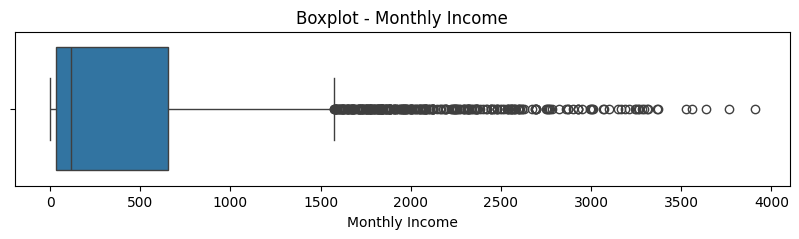

In [ ]:
## Outlier Detection (IQR)
q1 = monthly_series.quantile(0.25)
q3 = monthly_series.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = monthly_series[(monthly_series < lower) | (monthly_series > upper)]

print(f'IQR: {iqr}, Lower Bound: {lower}, Upper Bound: {upper}, Outliers: {len(outliers)}')

#Box Plot
plt.figure(figsize=(10, 2))
sns.boxplot(x=monthly_series)
plt.title('Boxplot - Monthly Income')
plt.xlabel('Monthly Income')
plt.show()

In [ ]:
## Data Insight - Graphs!

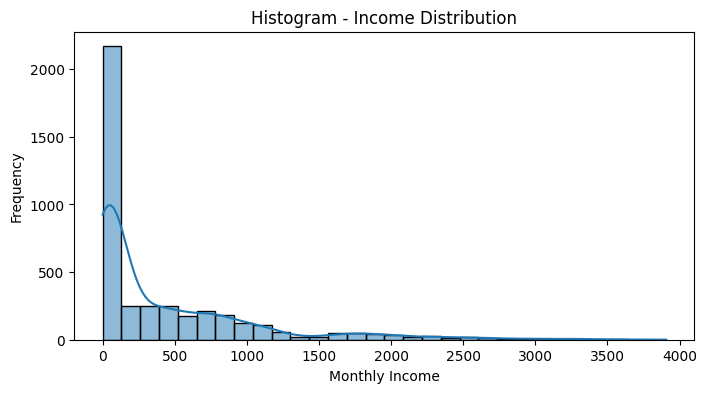

In [ ]:
# Histogram

plt.figure(figsize=(8, 4))
sns.histplot(monthly_series, bins=30, kde=True)
plt.title('Histogram - Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

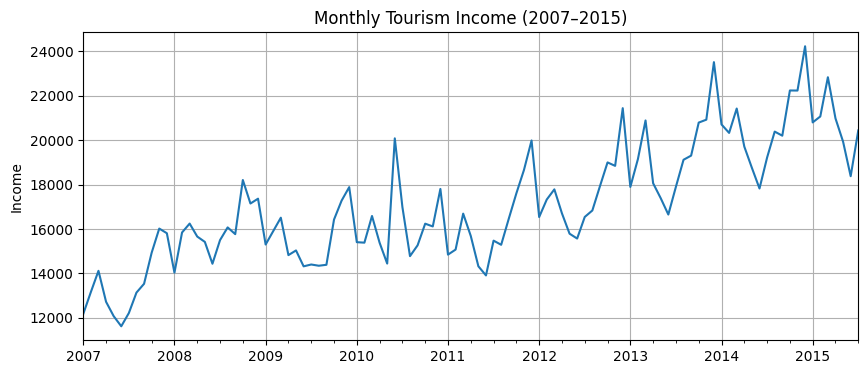

In [ ]:
## Line Graph
monthly_data = df[monthly_cols]
monthly_totals = monthly_data.sum()
monthly_totals.index = pd.to_datetime(monthly_totals.index.str[2:], format='%m%Y')
monthly_totals.sort_index(inplace=True)
monthly_totals.plot(kind='line', title='Monthly Tourism Income (2007–2015)', figsize=(10, 4))
plt.ylabel('Income')
plt.grid()
plt.show()

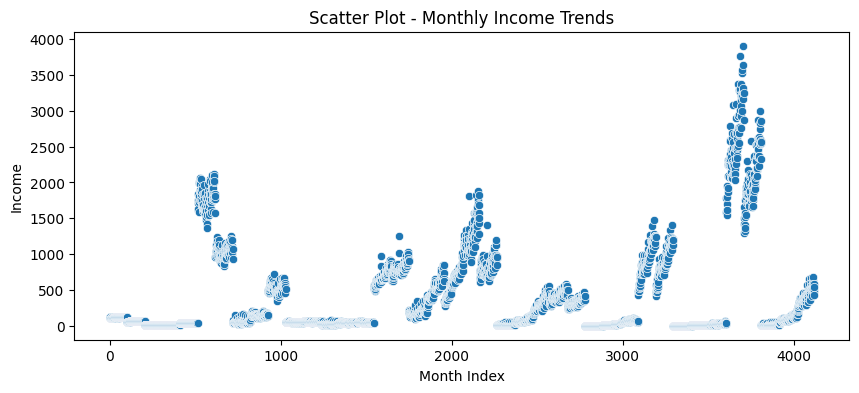

In [ ]:
## Scatter Plot

plt.figure(figsize=(10, 4))
sns.scatterplot(x=range(len(monthly_series)), y=monthly_series)
plt.title('Scatter Plot - Monthly Income Trends')
plt.xlabel('Month Index')
plt.ylabel('Income')
plt.show()

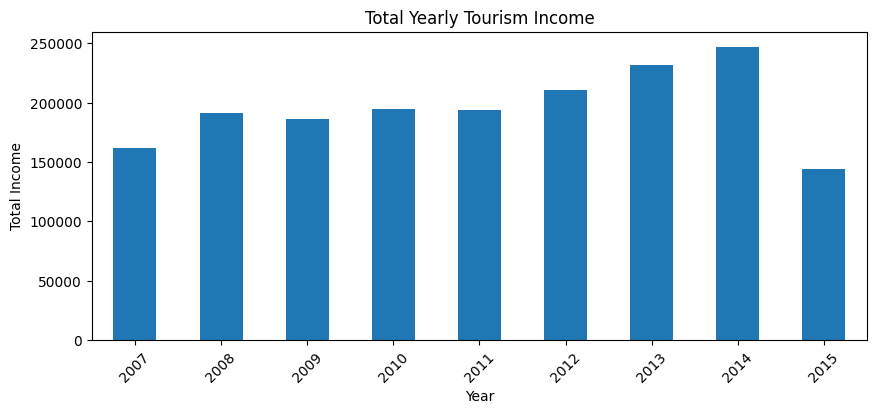

In [ ]:
## Bar Graph

monthly_totals.index.name = 'Date'
monthly_totals_df = monthly_totals.reset_index().rename(columns={0: 'Income'})
monthly_totals_df['Year'] = monthly_totals_df['Date'].dt.year
yearly_income = monthly_totals_df.groupby('Year')['Income'].sum()
yearly_income.plot(kind='bar', title='Total Yearly Tourism Income', figsize=(10, 4))
plt.ylabel('Total Income')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

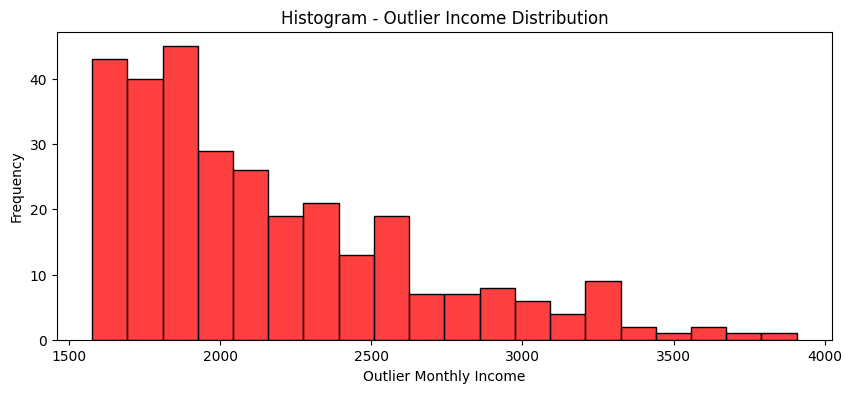

In [ ]:
## Histogram

plt.figure(figsize=(10, 4))
sns.histplot(outliers, bins=20, color='red')
plt.title('Histogram - Outlier Income Distribution')
plt.xlabel('Outlier Monthly Income')
plt.ylabel('Frequency')
plt.show()

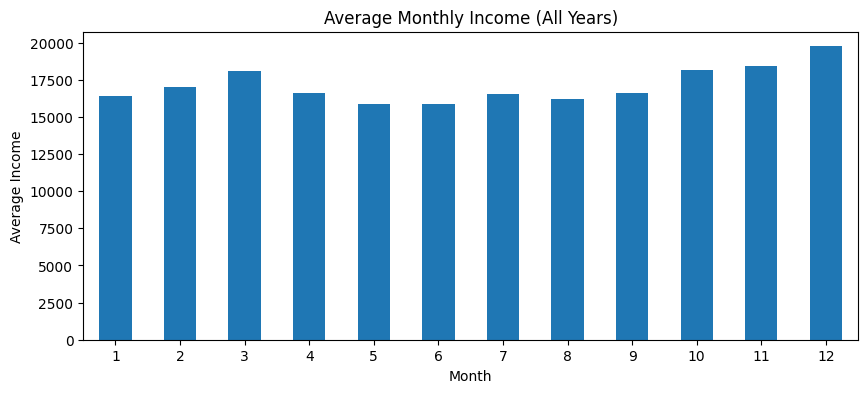

In [ ]:
## Bar Graph

monthly_totals_df['Month'] = monthly_totals_df['Date'].dt.month
avg_monthly_income = monthly_totals_df.groupby('Month')['Income'].mean()
avg_monthly_income.plot(kind='bar', title='Average Monthly Income (All Years)', figsize=(10, 4))
plt.ylabel('Average Income')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()

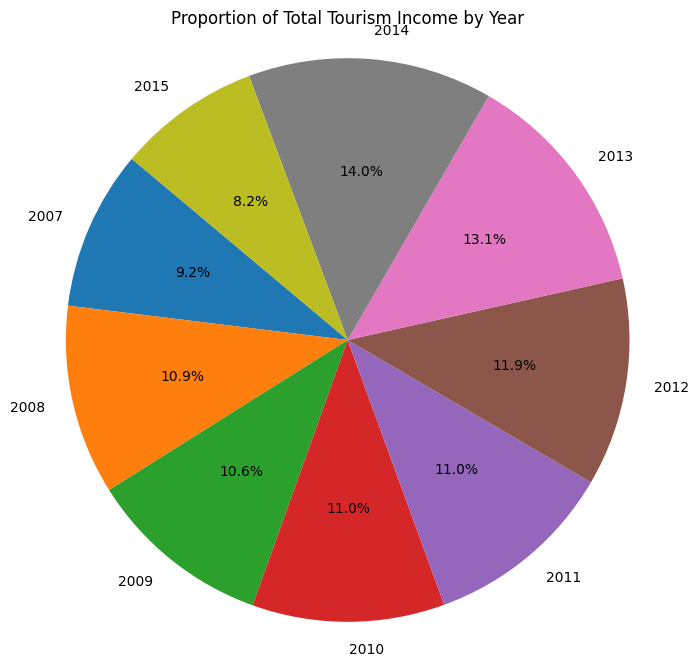

In [ ]:
## Pie Chart

plt.figure(figsize=(8, 8))
plt.pie(yearly_income, labels=yearly_income.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Tourism Income by Year')
plt.axis('equal')
plt.show()